In [15]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [16]:
bs = 128

In [17]:
train_datagen= ImageDataGenerator(rescale=1/255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)
train= train_datagen.flow_from_directory(r'/kaggle/input/mrl-eye-dataset/data/train',
                                target_size=(224,224),batch_size=bs,class_mode='categorical',
                                              seed=42,subset='training',interpolation='nearest',shuffle=True)
valid= train_datagen.flow_from_directory(r'/kaggle/input/mrl-eye-dataset/data/train',
                                target_size=(224,224),batch_size=bs,class_mode='categorical',
                                                   seed=42,subset='validation',interpolation='nearest',shuffle=True)

Found 65340 images belonging to 2 classes.
Found 16335 images belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1/255)

test= test_datagen.flow_from_directory(r'/kaggle/input/mrl-eye-dataset/data/test',
                                target_size=(224,224),batch_size=bs,class_mode='categorical',
                                            seed=None,interpolation='nearest',shuffle=True)

Found 3223 images belonging to 2 classes.


In [19]:
# bmodel = DenseNet201(include_top=False,weights='imagenet',pooling=max,input_tensor=Input(shape=(224,224,3)))
# hmodel = bmodel.output
# hmodel = Flatten()(hmodel)
# hmodel = Dense(128, activation='relu')(hmodel)
# hmodel = Dropout(0.3)(hmodel)
# hmodel = Dense(2,activation= 'softmax')(hmodel)

# from tensorflow.keras.models import Model
# model = Model(inputs=bmodel.input, outputs= hmodel)
# for layer in bmodel.layers:
#     layer.trainable = False

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

pretrained_model= DenseNet201(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               983552    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 19,306,562
Trainable params: 984,578
Non-trainable params: 18,321,984
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [24]:
#pip install livelossplot

In [25]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss = PlotLossesCallback()

check_pt = ModelCheckpoint(r'/kaggle/working/model.h5', 
                           monitor='val_loss', save_best_only=True, verbose=3)
early_st = EarlyStopping(monitor='val_loss', patience=3, verbose=3, restore_best_weights=True)
learn_rt =  ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=3)
callbacks =[check_pt,early_st,learn_rt,plot_loss]

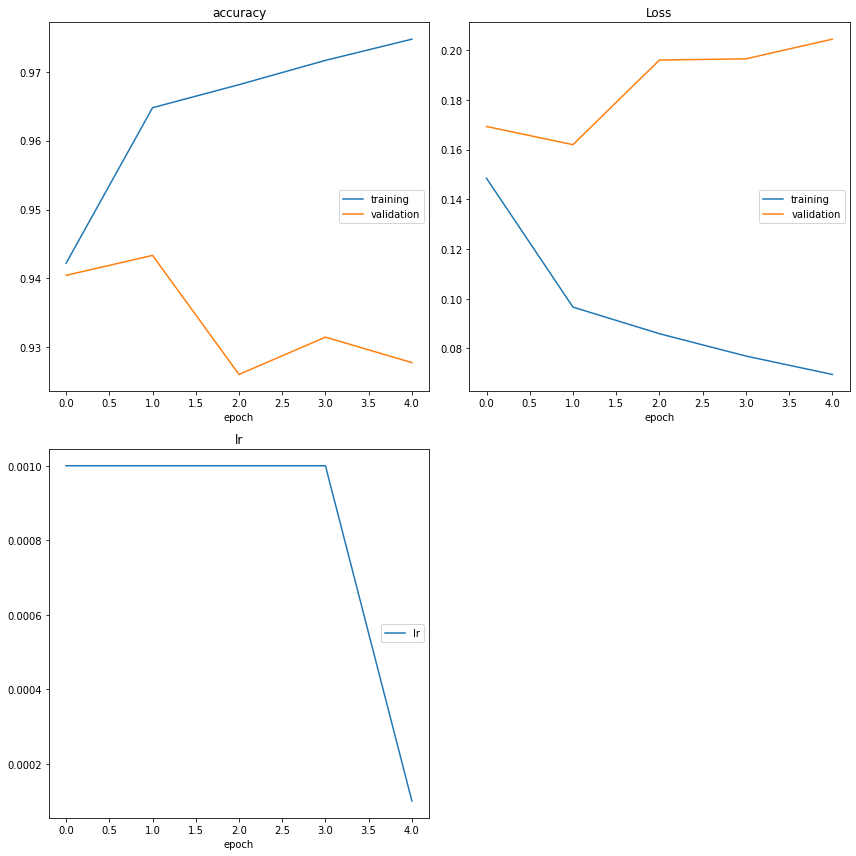

accuracy
	training         	 (min:    0.942, max:    0.975, cur:    0.975)
	validation       	 (min:    0.926, max:    0.943, cur:    0.928)
Loss
	training         	 (min:    0.070, max:    0.148, cur:    0.070)
	validation       	 (min:    0.162, max:    0.204, cur:    0.204)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
Epoch 00005: early stopping


In [28]:
model.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train,steps_per_epoch=train.samples//bs,
                   validation_data=valid,
                   validation_steps=valid.samples//bs,
                    callbacks = callbacks, verbose=1,
                    epochs=12)

In [29]:
model.evaluate(test)

26/26 [==============================] - 28s 1s/step - loss: 0.2156 - accuracy: 0.9131


[0.21559517085552216, 0.9131244421005249]

In [30]:
model.evaluate(valid)

128/128 [==============================] - 261s 2s/step - loss: 0.1588 - accuracy: 0.9442


[0.158829003572464, 0.9442301988601685]

In [31]:
model.evaluate(train)

511/511 [==============================] - 1066s 2s/step - loss: 0.0885 - accuracy: 0.9692


[0.0885154977440834, 0.9692225456237793]